In [1]:
# 简单用法
import qrcode
img = qrcode.make('Some data here')
type(img)  # qrcode.image.pil.PilImage
img.save("some_file.png")

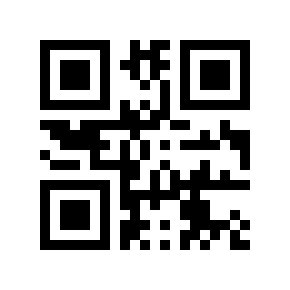

In [5]:
# 自制定制二维码
import qrcode
qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=10,
    border=4,
)
qr.add_data('Some data')
qr.make(fit=True)

img = qr.make_image(fill_color="black", back_color="white")
img

C:\Users\TGY\AppData\Local\Temp\ipykernel_112548\4114226202.py:37: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  icon = icon.resize((icon_w, icon_h), Image.ANTIALIAS)


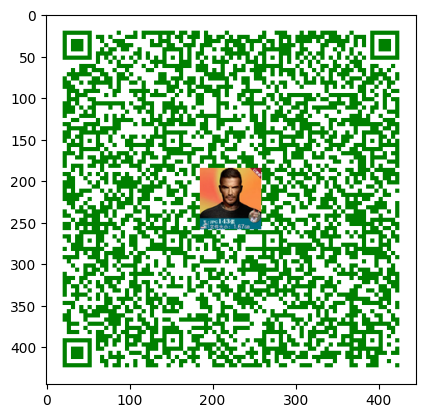

In [12]:
# 额外添加图片
## 二维码中间都有一张图片或者用户头像
import qrcode
from PIL import Image
import matplotlib.pyplot as plt
 
 
def getQRcode(data, file_name):
    qr = qrcode.QRCode(
        version=1,
        error_correction=qrcode.constants.ERROR_CORRECT_H,
        box_size=5,
        border=4,
    )
 
    # 添加数据
    qr.add_data(data)
    # 填充数据
    qr.make(fit=True)
    # 生成图片
    img = qr.make_image(fill_color="green", back_color="white")
 
    # 添加logo，打开logo照片
    icon = Image.open("logo.jpg")
    # 获取图片的宽高
    img_w, img_h = img.size
    # 参数设置logo的大小
    factor = 6
    size_w = int(img_w / factor)
    size_h = int(img_h / factor)
    icon_w, icon_h = icon.size
    if icon_w > size_w:
        icon_w = size_w
    if icon_h > size_h:
        icon_h = size_h
    # 重新设置logo的尺寸
    icon = icon.resize((icon_w, icon_h), Image.ANTIALIAS)
    # 得到画图的x，y坐标，居中显示
    w = int((img_w - icon_w) / 2)
    h = int((img_h - icon_h) / 2)
    # 黏贴logo照
    img.paste(icon, (w, h), mask=None)
    # 终端显示图片
    plt.imshow(img)
    plt.show()
    # 保存img
    img.save(file_name)
    return img
 
 
if __name__ == '__main__':
    getQRcode("世情薄，人情恶，雨送黄昏花易落。晓风干，泪痕残，欲笺心事，独语斜阑。"
              "难，难，难！人成各，今非昨，病魂常似秋千索。角声寒，夜阑珊，怕人寻问，咽泪装欢。瞒，瞒，瞒！", 'my.png')